<a href="https://colab.research.google.com/github/noeffortnomoney/CS114.L22.KHCL/blob/main/Colab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bài tập colab số 02. Dự đoán thời gian chạy của chương trình.

##Thêm các thư viện cần thiết:

In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Xử lý dữ liệu train và test:

In [ ]:
url_1="https://cs.uit.edu.vn/data2.txt"
data_1=pd.read_csv(url_1,names=['size','time'])
url_2="https://cs.uit.edu.vn/data3.txt"
data_2=pd.read_csv(url_2,names=['size','time'])

In [ ]:
data_1.head()

,size,time
0,6083695,0.521842
1,1954367,0.152648
2,3734185,0.298548
3,5839301,0.460480
4,6343427,0.527977


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71115 entries, 0 to 71114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    71115 non-null  int64  
 1   time    71115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.1 MB


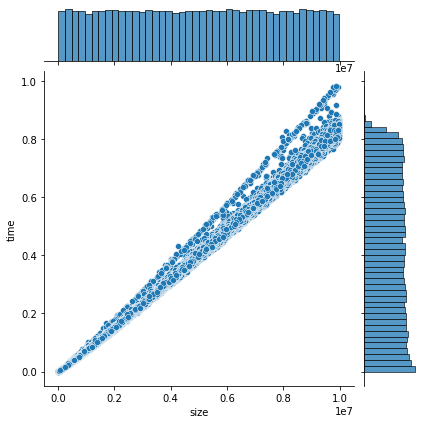

In [ ]:
sns.jointplot(x = 'size', y = 'time', data = data_1)

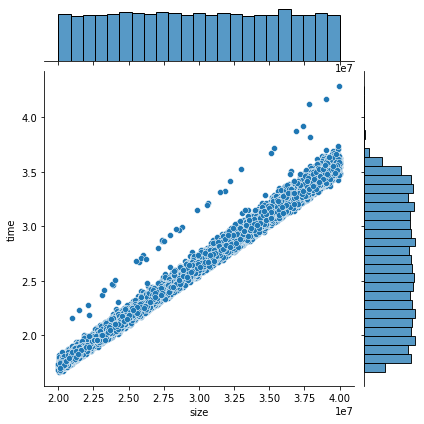

In [ ]:
sns.jointplot(x = 'size', y = 'time', data = data_2)

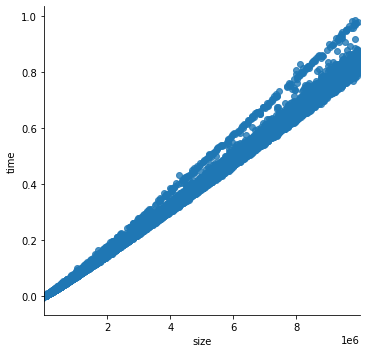

In [ ]:
sns.lmplot( x = 'size' , y = 'time', data = data_1)

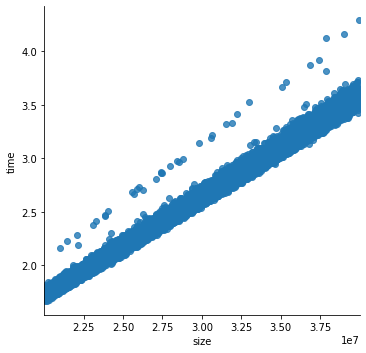

In [ ]:
sns.lmplot( x = 'size' , y = 'time', data = data_2)

In [ ]:

X_1 = np.array(data_1['size']).reshape(-1,1)
y_1 = np.array(data_1['time'])


In [ ]:
print(X_1.shape,y_1.shape)

(71115, 1) (71115,)


##Xử lý dữ liệu lần thứ nhất:

In [ ]:
from sklearn.linear_model import LinearRegression
lR = LinearRegression().fit(X_1, y_1)

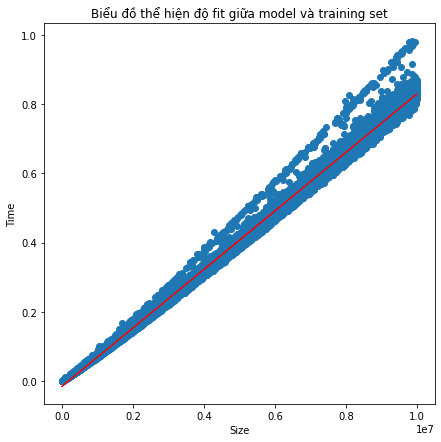

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và training set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_1, y_1)
plt.plot(X_1, lR.predict(X_1), color='red', linewidth=1)
fig.show()

In [ ]:
y_pred=lR.predict(X_2)

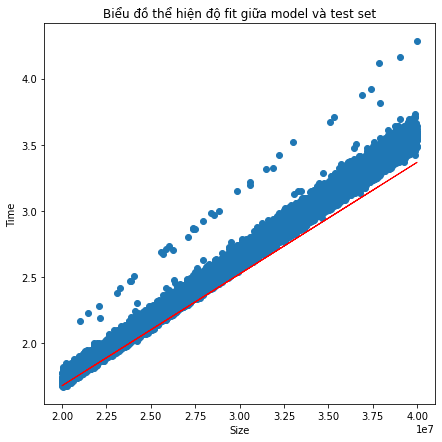

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và test set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_2, y_2)
plt.plot(X_2, y_pred, color='red', linewidth=1)
fig.show()

In [ ]:
X_2 = np.array(data_2['size']).reshape(-1,1)
y_2 = np.array(data_2['time'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

print(f'R2 Score: {r2_score(y_2, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_2, y_pred)}')
print(f'Mean absolute error score: {mean_absolute_error(y_2, y_pred)}')

R2 Score: 0.9284132208349453
Mean squared error: 0.020664949397549082
Mean absolute error score: 0.12271198006925235


In [ ]:
print(np.average(y_2))

2.642811968838527


In [ ]:
MSE=mean_squared_error(y_2, y_pred)
print(f'Error: {np.sqrt(MSE)/np.average(y_2)}')

Error: 0.05439398887357004


##Xử lý dữ liệu lần thứ hai:

In [ ]:
X_2_1 = np.zeros((np.size(X_1),5))

In [ ]:
X_2_1[:,:1] = X_1
X_2_1[:,1:2] = X_1**2
X_2_1[:,2:3] = np.log(X_1)
X_2_1[:,3:4] = X_1*np.log(X_1)

In [ ]:
X_2_3 = np.zeros((np.size(X_1),5))
X_2_3[:,:1] = X_1
print(X_2_3)
X_2_3[:,1:2] = X_1**2
print(X_2_3)
X_2_3[:,2:3] = np.log(X_1)
print(X_2_3)
X_2_3[:,3:4] = X_1*np.log(X_1)
print(X_2_3)

[[6083695.       0.       0.       0.       0.]
 [1954367.       0.       0.       0.       0.]
 [3734185.       0.       0.       0.       0.]
 ...
 [9837364.       0.       0.       0.       0.]
 [9466593.       0.       0.       0.       0.]
 [4080801.       0.       0.       0.       0.]]
[[6.08369500e+06 3.70113449e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.95436700e+06 3.81955037e+12 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.73418500e+06 1.39441376e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 ...
 [9.83736400e+06 9.67737305e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.46659300e+06 8.96163830e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.08080100e+06 1.66529368e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
[[6.08369500e+06 3.70113449e+13 1.56211228e+01 0.00000000e+00
  0.00000000e+00]
 [1.95436700e+06 3.81955037e+12 1.44855769e+01 0.00000000e+00
  0.00000000e+00]
 [3.73418500e+06 1.39441376e+13 1.51330401e+01 0.00000000e+0

In [ ]:
X_2_2 = np.zeros((np.size(X_2),5))

In [ ]:
X_2_2[:,:1] = X_2
X_2_2[:,1:2] = X_2**2
X_2_2[:,2:3] = np.log(X_2)
X_2_2[:,3:4] = X_2*np.log(X_2)

In [ ]:
lR.fit(X_2_1,y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

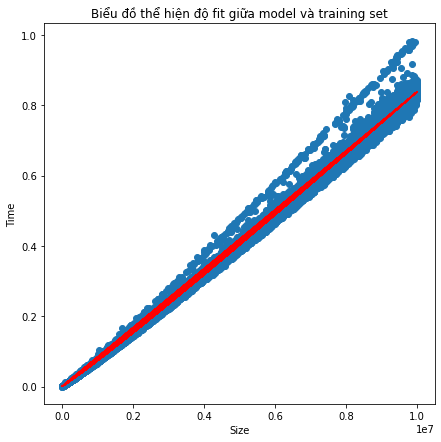

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và training set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_1, y_1)
plt.plot(X_1, lR.predict(X_2_1), color='red', linewidth=1)
fig.show()

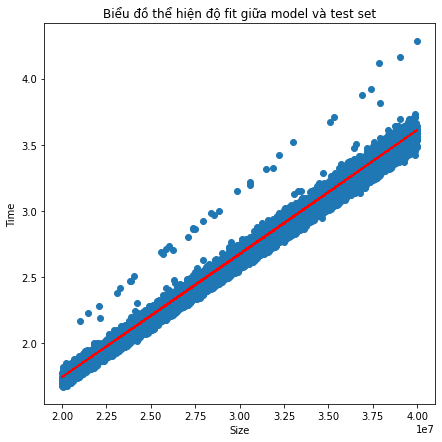

In [ ]:
fig = plt.figure(figsize=(7, 7))
plt.title('Biểu đồ thể hiện độ fit giữa model và test set')
plt.xlabel('Size')
plt.ylabel('Time')
plt.scatter(X_2, y_2)
plt.plot(X_2, lR.predict(X_2_2), color='red', linewidth=1)
fig.show()

In [ ]:
y_pred2=lR.predict(X_2_2)

In [ ]:
print(f'R2 Score: {r2_score(y_2, y_pred2)}')
print(f'Mean squared error: {mean_squared_error(y_2, y_pred2)}')
print(f'Mean absolute error score: {mean_absolute_error(y_2, y_pred2)}')

R2 Score: 0.9855156510987032
Mean squared error: 0.004181195754199487
Mean absolute error score: 0.04998488887439552


In [ ]:
MSE=mean_squared_error(y_2, y_pred2)
print(f'Error: {np.sqrt(MSE)/np.average(y_2)}')

Error: 0.024467183851972076


##Nguồn tham khảo:

[pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

[scikit_learn_1](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

[scikit_learn_2](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)